# Importing Module

In [1]:
#kplr used to import koi data easier
import kplr
client = kplr.API()

#used to open .fits files
import pyfits
# import astropy

#Used for plotting and numerical functions
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Importing Data

In [17]:
# Find a KOI.
koi = client.koi(17.01)

#period, period error (postive & negative)
print 'Period w/ errors: ',(koi.koi_period, koi.koi_period_err1, koi.koi_period_err2)
print koi.kepid
# This KOI has an associated star.
star = koi.star
print "Associated Star Temperature: ",(star.kic_teff)

#Download the lightcurves for this KOI.
lightcurves = koi.get_light_curves()
# for lc in lightcurves:
#     print (lc.filename)

Period w/ errors:  (0.00078, -0.00078, None)
10874614
Associated Star Temperature:  None


Getting Like Curve Data

In [7]:
# Loop over the datasets and read in the data.
time, flux, ferr, quality = [], [], [], []
for lc in lightcurves:
    with lc.open() as f:
        # The lightcurve data are in the first FITS HDU.
        hdu_data = f[1].data
        time.append(hdu_data["time"])
        flux.append(hdu_data["sap_flux"])
        ferr.append(hdu_data["sap_flux_err"])
        quality.append(hdu_data["sap_quality"])

Plotting Data

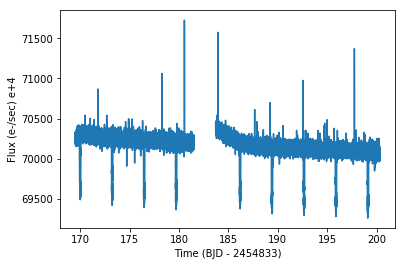

In [12]:
#Time (BJD - 2454833)
#Flux (e-/sec) + ____e+4
#Which quarter do you want to look at?
quarter = 2

#plotting Light curve
plt.figure()
# print len(time)
# print len(time[quarter])
# print len(flux[quarter])
plt.plot(time[quarter],flux[quarter])
plt.xlabel('Time (BJD - 2454833)')
plt.ylabel('Flux (e-/sec) e+4')

In [5]:
#using pyfits to open a quarter of data as .fits file
pyfits.open('c:/Users/rscsa/.kplr/data/lightcurves/010874614/kplr010874614-2009131105131_llc.fits')
print pyfits.hdu.image.PrimaryHDU()